Problem statement: Mental health has been a growing concern around the world due to the adverse effect it has on the society.
In recent times, lifestyle factors have been considered to be significant determinants for identifying and managing mental health conditions, therefore, experts support from various disciplines have been solicited to help with the identification and administration of lifestyle factors for managing mental health issues.

Value Proposition: This project is going to identify the life style factors and behaviours that indicates mental health disorder 
and also accurately predict the mental health status of individual by answering some of the questions in the project.

Success Metric: The aim is to achieve an accuracy score of about 70 - 95%. Accuracy score between 70 and 78% will be worked on to improve the accuracy score by adding extra data to the dataset and carrying out hyperparameter tuning techniques. 

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
from pandas import read_csv
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn import preprocessing
from matplotlib import pyplot as plt
from sklearn.impute import SimpleImputer
from pandas.plotting import scatter_matrix
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
# naming the columns in the data set and reading in the csv file using the pandas lib
header = ['Time_stamp', 'Sex', 'Age', 'Marital_status', 'Parents_MS', 'Ethnicity', 'Religion', 'Student_sts', 
          'Employment', 'Income', 'Tuition', 'Debt', 'Current_year', 'Course', 'Course_interest', 'Commute', 'Personality',
          'MH_support', 'Pressure_succeed', 'Cause_succeed', 'Alone', 'Stressed', 'Condition', 'Lessons', 'Break', 'Sleep', 
          'Social_media', 'Smoking', 'Alcohol', 'Family_MH', 'MH_status']
my_data = read_csv('Mental Health Survey.csv', names=header, header=None, skiprows=1)
my_data.head()

Time_stamp     Sex Age Marital_status Parents_MS  \
0  2021/04/14 10:13:01 pm CET    Male  21  Never married    Married   
1  2021/04/14 10:19:54 pm CET  Female  19  Never married    Married   
2  2021/04/14 10:24:08 pm CET    Male  19  Never married   Divorced   
3  2021/04/14 10:24:09 pm CET    Male  21  Never married    Married   
4  2021/04/14 10:27:18 pm CET  Female  19  Never married    Married   

             Ethnicity              Religion               Student_sts  \
0  Asian/Asian British          Christianity  I am a home student (UK)   
1  Asian/Asian British          Christianity  I am a home student (UK)   
2  Asian/Asian British  Atheist/Unaffiliated  I am a home student (UK)   
3  Asian/Asian British          Christianity  I am a home student (UK)   
4                White  Atheist/Unaffiliated  I am a home student (UK)   

                                          Employment                  Income  \
0  No, i am not in any type of employment. Strict...  Middle Class (£23,300)   
1                     I am in a part time employment  Middle Class (£23,300)   
2  No, i am not in any type of employment. Strict...  Middle Class (£23,300)   
3                                I am in a full time    High Class (£49,000)   
4                     I am in a part time employment    High Class (£49,000)   

   ...    Stressed                         Condition    Lessons  \
0  ...  Very Often  Living in student house (agency)        2-3   
1  ...       Often      Living at home (with family)        2-3   
2  ...   Sometimes      Living at home (with family)  5 or more   
3  ...   Not often      Living at home (with family)  5 or more   
4  ...       Often      Living at home (with family)  5 or more   

              Break      Sleep          Social_media       Smoking  \
0  13 hours or more  7-9 hours              3+ hours  Never smoked   
1  13 hours or more  7-9 hours             2-3 hours  Never smoked   
2  13 hours or more  7-9 hours             1-2 hours  Never smoked   
3        9-10 hours  4-6 hours  Less than 30 minutes  Never smoked   
4       11-12 hours  7-9 hours              3+ hours  Never smoked   

               Alcohol  Family_MH MH_status  
0  Never drank alcohol        Yes         7  
1  Never drank alcohol         No         7  
2  Never drank alcohol        Yes         7  
3  Never drank alcohol         No         8  
4  Never drank alcohol         No         8  

[5 rows x 31 columns]

In [3]:
#dimension and data info of the data set 
print(my_data.shape)
my_data.info()

(107, 31)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 31 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Time_stamp        107 non-null    object 
 1   Sex               107 non-null    object 
 2   Age               107 non-null    object 
 3   Marital_status    105 non-null    object 
 4   Parents_MS        106 non-null    object 
 5   Ethnicity         106 non-null    object 
 6   Religion          105 non-null    object 
 7   Student_sts       105 non-null    object 
 8   Employment        105 non-null    object 
 9   Income            106 non-null    object 
 10  Tuition           107 non-null    object 
 11  Debt              106 non-null    object 
 12  Current_year      105 non-null    object 
 13  Course            106 non-null    object 
 14  Course_interest   105 non-null    float64
 15  Commute           107 non-null    object 
 16  Personality       105 non-null    

In [4]:
#exploring unique value in age variable
my_data['Age'].unique()

array(['21', '19', '20', '17 or less', '26 or older', '25', '18', '23',
       '24', '22'], dtype=object)

In [5]:
my_data['Sex'].unique()

array(['Male', 'Female', 'Prefer not to say', 'Other'], dtype=object)

Age variable comes with 10 unique values and this values are between age '17 or less' and '26 or older' while the Gender 
variable has 4 unique values

Checking For Null Values.

In [6]:
#displaying null values in our data set 
empty_value = my_data[my_data.isna().any(axis=1)]
empty_value

Time_stamp                Sex         Age Marital_status  \
5   2021/04/14 10:43:26 pm CET             Female          21  Never married   
9   2021/04/14 11:05:54 pm CET               Male          20  Never married   
11  2021/04/14 11:07:55 pm CET             Female  17 or less  Never married   
20  2021/04/14 11:34:11 pm CET             Female          19  Never married   
26  2021/04/15 12:04:58 am CET             Female          23  Never married   
27  2021/04/15 12:10:07 am CET             Female          21  Never married   
48   2021/04/20 7:52:02 pm CET             Female          24  Never married   
49  2021/04/21 12:01:24 pm CET             Female          19            NaN   
50  2021/04/21 12:01:35 pm CET             Female          19            NaN   
51  2021/04/21 12:07:42 pm CET  Prefer not to say          19  Never married   
56  2021/04/21 12:28:41 pm CET             Female          20  Never married   
57  2021/04/21 12:29:40 pm CET             Female          20  Never married   
72  2021/04/21 12:49:43 pm CET              Other          20  Never married   
77  2021/04/21 12:56:31 pm CET               Male          23  Never married   
82   2021/04/21 1:02:49 pm CET               Male          20  Never married   

       Parents_MS            Ethnicity              Religion  \
5         Married  Asian/Asian British          Christianity   
9         Married  Asian/Asian British          Christianity   
11        Married  Asian/Asian British          Christianity   
20        Married                White          Christianity   
26        Married  Asian/Asian British                   NaN   
27        Married  Asian/Asian British                   NaN   
48        Married  Asian/Asian British     Prefer not to say   
49  Never married                Other     Prefer not to say   
50  Never married                Other     Prefer not to say   
51        Married  Asian/Asian British                 Other   
56        Married  Asian/Asian British  Atheist/Unaffiliated   
57        Married  Asian/Asian British  Atheist/Unaffiliated   
72            NaN                  NaN                 Other   
77        Married       Mixed/Multiple              Catholic   
82       Divorced  Asian/Asian British  Atheist/Unaffiliated   

                                          Student_sts  \
5                        I am a European student (EU)   
9                        I am a European student (EU)   
11                           I am a home student (UK)   
20                           I am a home student (UK)   
26  I am an international student (Any other place...   
27                       I am a European student (EU)   
48                           I am a home student (UK)   
49                           I am a home student (UK)   
50                           I am a home student (UK)   
51                           I am a home student (UK)   
56                                                NaN   
57                                                NaN   
72                           I am a home student (UK)   
77                           I am a home student (UK)   
82                           I am a home student (UK)   

                                           Employment                  Income  \
5                                                 NaN  Middle Class (£23,300)   
9   No, i am not in any type of employment. Strict...  Middle Class (£23,300)   
11  No, i am not in any type of employment. Strict...  Middle Class (£23,300)   
20  No, i am not in any type of employment. Strict...    High Class (£49,000)   
26  No, i am not in any type of employment. Strict...    High Class (£49,000)   
27                                I am in a full time  Middle Class (£23,300)   
48                                I am in a full time  Middle Class (£23,300)   
49                     I am in a part time employment  Middle Class (£23,300)   
50                     I am in a part time employment  Middle Class (£23

We can see from the data above that our data set has 15 rows with null values.joyou

In [7]:
#replacing null value with most frequent value in each column  since our data is mostly categorical
imputer = SimpleImputer(strategy='most_frequent')
imputer.fit(my_data)
new_data = imputer.transform(my_data)

In [8]:
#search for null values in our dataset 
my_data = pd.DataFrame(data=new_data, columns=header)
empty_value = my_data[my_data.isna(). any(axis=1)]
empty_value

Empty DataFrame
Columns: [Time_stamp, Sex, Age, Marital_status, Parents_MS, Ethnicity, Religion, Student_sts, Employment, Income, Tuition, Debt, Current_year, Course, Course_interest, Commute, Personality, MH_support, Pressure_succeed, Cause_succeed, Alone, Stressed, Condition, Lessons, Break, Sleep, Social_media, Smoking, Alcohol, Family_MH, MH_status]
Index: []

[0 rows x 31 columns]

In [9]:
#searchig for columns with null value 
my_data.isnull().sum()
#we can see that we have been able to get rid of null values from our dataset

Time_stamp          0
Sex                 0
Age                 0
Marital_status      0
Parents_MS          0
Ethnicity           0
Religion            0
Student_sts         0
Employment          0
Income              0
Tuition             0
Debt                0
Current_year        0
Course              0
Course_interest     0
Commute             0
Personality         0
MH_support          0
Pressure_succeed    0
Cause_succeed       0
Alone               0
Stressed            0
Condition           0
Lessons             0
Break               0
Sleep               0
Social_media        0
Smoking             0
Alcohol             0
Family_MH           0
MH_status           0
dtype: int64

In [10]:
#Dropping the the timestampt column because it has no effect on our data 
my_data.drop(['Time_stamp'], axis=1, inplace=True )
my_data.head()
new_header = ['Sex', 'Age', 'Marital_status', 'Parents_MS', 'Ethnicity', 'Religion', 'Student_sts', 
              'Employment', 'Income', 'Tuition', 'Debt', 'Current_year', 'Course', 'Course_interest', 'Commute', 'Personality',
              'MH_support', 'Pressure_succeed', 'Cause_succeed', 'Alone', 'Stressed', 'Condition', 'Lessons', 'Break', 'Sleep', 
              'Social_media', 'Smoking', 'Alcohol', 'Family_MH', 'MH_status']

In [11]:
#Displaying Unique Values in each column to better understand our dataset 
for col in new_header: 
    print('{} :{} ' . format(col.upper(),my_data[col].unique()))

SEX :['Male' 'Female' 'Prefer not to say' 'Other'] 
AGE :['21' '19' '20' '17 or less' '26 or older' '25' '18' '23' '24' '22'] 
MARITAL_STATUS :['Never married' 'Married'] 
PARENTS_MS :['Married' 'Divorced' 'Separated' 'Never married' 'Widowed'] 
ETHNICITY :['Asian/Asian British' 'White' 'Other'
 'Black/African/Caribbean/Black British' 'Mixed/Multiple'] 
RELIGION :['Christianity' 'Atheist/Unaffiliated' 'Buddhism' 'Other' 'Islam'
 'Catholic' 'Christian' 'Prefer not to say'] 
STUDENT_STS :['I am a home student (UK)' 'I am a European student (EU)'
 'I am an international student (Any other place apart from EU/UK)'] 
EMPLOYMENT :['No, i am not in any type of employment. Strictly a student'
 'I am in a part time employment' 'I am in a full time'] 
INCOME :['Middle Class (£23,300)' 'High Class (£49,000)' 'Low Class (£9,200)'] 
TUITION :['Bursary/student loan (money from the government)' 'Family support'
 'Other Scholarships, Grants or Bursaries'] 
DEBT :['No' 'Yes'] 
CURRENT_YEAR :['Third Yea

In [12]:
my_data['Age'].replace(['17 or less'], 17, inplace=True)
my_data['Age'].replace(['26 or older'], 26, inplace=True)

In [13]:
my_data['Age'].unique()

array(['21', '19', '20', 17, 26, '25', '18', '23', '24', '22'],
      dtype=object)

In [14]:
# Enconding our categorical columns using label encoder 
object_cols = ['Sex', 'Marital_status', 'Parents_MS', 'Ethnicity', 'Debt',
               'Religion', 'Student_sts', 'Employment', 'Tuition',
               'Course', 'Commute', 'Personality', 'MH_support', 'Cause_succeed', 
               'Condition', 'Family_MH']
label_encoder = LabelEncoder()
for col in object_cols:
    label_encoder.fit(my_data[col])
    my_data[col] = label_encoder.transform(my_data[col])

In [15]:
my_data.head()

Sex Age  Marital_status  Parents_MS  Ethnicity  Religion  Student_sts  \
0    1  21               1           1          0         4            1   
1    0  19               1           1          0         4            1   
2    1  19               1           0          0         0            1   
3    1  21               1           1          0         4            1   
4    0  19               1           1          4         0            1   

   Employment                  Income  Tuition  ...    Stressed Condition  \
0           2  Middle Class (£23,300)        0  ...  Very Often         2   
1           1  Middle Class (£23,300)        0  ...       Often         0   
2           2  Middle Class (£23,300)        0  ...   Sometimes         0   
3           0    High Class (£49,000)        0  ...   Not often         0   
4           1    High Class (£49,000)        0  ...       Often         0   

     Lessons             Break      Sleep          Social_media       Smoking  \
0        2-3  13 hours or more  7-9 hours              3+ hours  Never smoked   
1        2-3  13 hours or more  7-9 hours             2-3 hours  Never smoked   
2  5 or more  13 hours or more  7-9 hours             1-2 hours  Never smoked   
3  5 or more        9-10 hours  4-6 hours  Less than 30 minutes  Never smoked   
4  5 or more       11-12 hours  7-9 hours              3+ hours  Never smoked   

               Alcohol  Family_MH MH_status  
0  Never drank alcohol          1         7  
1  Never drank alcohol          0         7  
2  Never drank alcohol          1         7  
3  Never drank alcohol          0         8  
4  Never drank alcohol          0         8  

[5 rows x 30 columns]

In [16]:
# Using Ordinal enconding for Ordinal variables

ordinal_code = {1:1, 2:1, 3:1, 4:1, 5:2, 6:2, 7:2, 8:3, 9:3, 10:3}

my_data['MH_status'] = my_data.MH_status.map(ordinal_code)
my_data['Pressure_succeed'] = my_data.Pressure_succeed.map(ordinal_code)
my_data['Course_interest'] = my_data.Course_interest.map(ordinal_code)


Year = {"First Year":1, "Second Year":2, "Third Year":3, "Fourth Year":4}
my_data['Current_year']=my_data.Current_year.map(Year)


income = {'Low Class (£9,200)':1, 'Middle Class (£23,300)':2, 'High Class (£49,000)':3}
my_data['Income']=my_data.Income.map(income)


alone = {"Never":1, "Not often":2, "Sometimes":3, "Often":4, "Very Often":5}
my_data['Alone'] = my_data.Alone.map(alone)


stressed = {"Not often":1, "Sometimes":2, "Often":3, "Very Often":4}
my_data['Stressed'] = my_data.Stressed.map(stressed)


lessons = {"1-2":1, "2-3":2, "3-4":3, "5 or more":4}
my_data['Lessons']=my_data.Lessons.map(lessons)


breaks = {"8 hours or less":1, "9-10 hours":2, "11-12 hours":3, "13 hours or more":4}
my_data['Break']=my_data.Break.map(breaks)


sleep = {"Less than 4 hours":1, "4-6 hours":2, "7-9 hours":3, "9+ hours":4}
my_data['Sleep']=my_data.Sleep.map(sleep)


Smedia = {"Less than 30 minutes":1, "30-60 minutes":2, "1-2 hours":3, "2-3 hours":4, "3+ hours":5}
my_data['Social_media']=my_data.Social_media.map(Smedia)


smoking = {"Never smoked":1, "Smoked, but stopped":2, "Moderate smoker":3, "Heavy smoker":4}
my_data['Smoking'] = my_data.Smoking.map(smoking)


alcohol = {"Never drank alcohol":1, "Drank alcohol, but stopped":2, 
           "Moderate alcohol drinker":3, "Heavy alcohol drinker":4}
my_data['Alcohol']=my_data.Alcohol.map(alcohol)


In [17]:
my_data.head()

Sex Age  Marital_status  Parents_MS  Ethnicity  Religion  Student_sts  \
0    1  21               1           1          0         4            1   
1    0  19               1           1          0         4            1   
2    1  19               1           0          0         0            1   
3    1  21               1           1          0         4            1   
4    0  19               1           1          4         0            1   

   Employment  Income  Tuition  ...  Stressed  Condition  Lessons  Break  \
0           2       2        0  ...         4          2        2      4   
1           1       2        0  ...         3          0        2      4   
2           2       2        0  ...         2          0        4      4   
3           0       3        0  ...         1          0        4      2   
4           1       3        0  ...         3          0        4      3   

   Sleep  Social_media  Smoking  Alcohol  Family_MH  MH_status  
0      3             5        1        1          1          2  
1      3             4        1        1          0          2  
2      3             3        1        1          1          2  
3      2             1        1        1          0          3  
4      3             5        1        1          0          3  

[5 rows x 30 columns]

In [18]:
my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107 entries, 0 to 106
Data columns (total 30 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Sex               107 non-null    int32 
 1   Age               107 non-null    object
 2   Marital_status    107 non-null    int32 
 3   Parents_MS        107 non-null    int32 
 4   Ethnicity         107 non-null    int32 
 5   Religion          107 non-null    int32 
 6   Student_sts       107 non-null    int32 
 7   Employment        107 non-null    int32 
 8   Income            107 non-null    int64 
 9   Tuition           107 non-null    int32 
 10  Debt              107 non-null    int32 
 11  Current_year      107 non-null    int64 
 12  Course            107 non-null    int32 
 13  Course_interest   107 non-null    int64 
 14  Commute           107 non-null    int32 
 15  Personality       107 non-null    int32 
 16  MH_support        107 non-null    int32 
 17  Pressure_succeed

In [19]:
my_data[new_header] = my_data[new_header].applymap(np.float) 
my_data.head()

<ipython-input-19-ea7eb775c69b>:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  my_data[new_header] = my_data[new_header].applymap(np.float)


Sex   Age  Marital_status  Parents_MS  Ethnicity  Religion  Student_sts  \
0  1.0  21.0             1.0         1.0        0.0       4.0          1.0   
1  0.0  19.0             1.0         1.0        0.0       4.0          1.0   
2  1.0  19.0             1.0         0.0        0.0       0.0          1.0   
3  1.0  21.0             1.0         1.0        0.0       4.0          1.0   
4  0.0  19.0             1.0         1.0        4.0       0.0          1.0   

   Employment  Income  Tuition  ...  Stressed  Condition  Lessons  Break  \
0         2.0     2.0      0.0  ...       4.0        2.0      2.0    4.0   
1         1.0     2.0      0.0  ...       3.0        0.0      2.0    4.0   
2         2.0     2.0      0.0  ...       2.0        0.0      4.0    4.0   
3         0.0     3.0      0.0  ...       1.0        0.0      4.0    2.0   
4         1.0     3.0      0.0  ...       3.0        0.0      4.0    3.0   

   Sleep  Social_media  Smoking  Alcohol  Family_MH  MH_status  
0    3.0           5.0      1.0      1.0        1.0        2.0  
1    3.0           4.0      1.0      1.0        0.0        2.0  
2    3.0           3.0      1.0      1.0        1.0        2.0  
3    2.0           1.0      1.0      1.0        0.0        3.0  
4    3.0           5.0      1.0      1.0        0.0        3.0  

[5 rows x 30 columns]

C:\Users\Emeka Ichoku\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


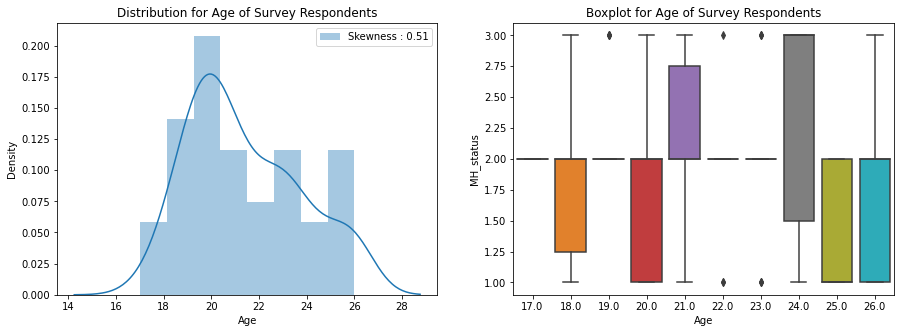

In [20]:
import seaborn as sns
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(my_data['Age'], label = 'Skewness : %.2f'%(my_data['Age'].skew()))
plt.legend(loc = 0, fontsize = 10)
plt.title('Distribution for Age of Survey Respondents')
plt.subplot(1,2,2)
sns.boxplot(x = "Age", y = "MH_status", data = my_data)
plt.title('Boxplot for Age of Survey Respondents')
#age = str(my_data['Age'].describe().round(2))
#plt.text(56, 0.85, age)
plt.show()
plt.show()

C:\Users\Emeka Ichoku\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


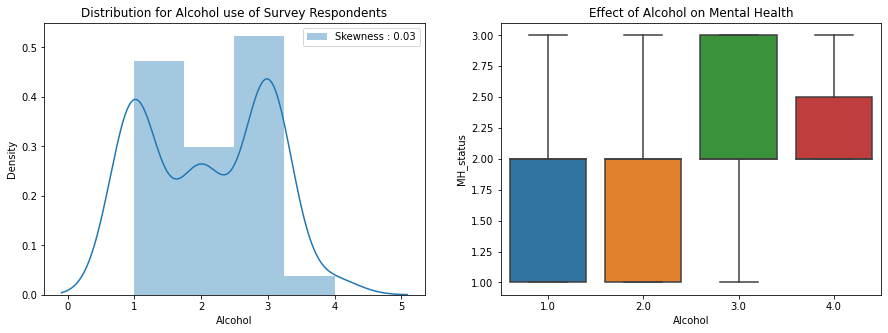

In [21]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.distplot(my_data['Alcohol'], label = 'Skewness : %.2f'%(my_data['Alcohol'].skew()))
plt.legend(loc = 0, fontsize = 10)
plt.title('Distribution for Alcohol use of Survey Respondents')
plt.subplot(1,2,2)
sns.boxplot(x = "Alcohol", y = "MH_status", data = my_data)
plt.title('Effect of Alcohol on Mental Health')
#age = str(my_data['Age'].describe().round(2))
#plt.text(56, 0.85, age)
plt.show()
plt.show()

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

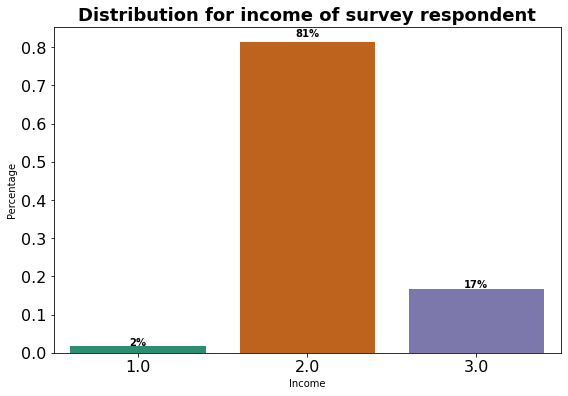

In [22]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = my_data['Income'].value_counts(normalize = True).rename_axis('Income').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'Income', y = 'Percentage', data = eda_percentage, palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Distribution for income of survey respondent', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [23]:
corr = my_data.corr(method="spearman")
corr

Sex       Age  Marital_status  Parents_MS  Ethnicity  \
Sex               1.000000  0.196552       -0.132048    0.034829   0.175691   
Age               0.196552  1.000000       -0.448081    0.162459   0.030561   
Marital_status   -0.132048 -0.448081        1.000000   -0.061762  -0.156272   
Parents_MS        0.034829  0.162459       -0.061762    1.000000   0.063582   
Ethnicity         0.175691  0.030561       -0.156272    0.063582   1.000000   
Religion          0.042157  0.001527       -0.000588    0.065155  -0.215822   
Student_sts      -0.083330  0.071394       -0.109523    0.026096  -0.025210   
Employment       -0.169086 -0.303709        0.065663   -0.028398  -0.076451   
Income           -0.051913  0.051423        0.019555    0.066777   0.145607   
Tuition           0.139701  0.047380       -0.134455    0.104202   0.015688   
Debt             -0.153958 -0.079407        0.086146    0.188795  -0.119162   
Current_year      0.027038  0.686083       -0.405697    0.038648  -0.108895   
Course           -0.167176  0.250950       -0.236322   -0.036202  -0.037793   
Course_interest  -0.097370  0.089519       -0.121530   -0.014557   0.148590   
Commute          -0.117438 -0.185471        0.090470   -0.331351  -0.163880   
Personality      -0.010861 -0.094984       -0.085438   -0.026527   0.057299   
MH_support       -0.020740 -0.123334        0.125442    0.044666   0.015791   
Pressure_succeed -0.179658 -0.203733        0.023772   -0.044886  -0.129457   
Cause_succeed    -0.041611  0.013506        0.048695    0.050927   0.038373   
Alone            -0.243150 -0.338117        0.298007   -0.176326  -0.170971   
Stressed         -0.035515 -0.073939       -0.057372   -0.090895  -0.056622   
Condition         0.012395  0.174173        0.219992    0.006108   0.024387   
Lessons           0.064937 -0.196994        0.044999   -0.032833  -0.051189   
Break            -0.025749 -0.136148       -0.018616   -0.025787   0.159101   
Sleep             0.049738 -0.256240        0.176345   -0.221497  -0.067323   
Social_media     -0.184498 -0.102210        0.090741   -0.060122   0.105728   
Smoking           0.002970  0.343885        0.043752    0.259689   0.134166   
Alcohol           0.149555  0.206218        0.026927    0.110231   0.240335   
Family_MH         0.187264  0.295942       -0.112892   -0.041603   0.149486   
MH_status         0.079627 -0.095903        0.091585    0.176491   0.129609   

                  Religion  Student_sts  Employment    Income   Tuition  ...  \
Sex               0.042157    -0.083330   -0.169086 -0.051913  0.139701  ...   
Age               0.001527     0.071394   -0.303709  0.051423  0.047380  ...   
Marital_status   -0.000588    -0.109523    0.065663  0.019555 -0.134455  ...   
Parents_MS        0.065155     0.026096   -0.028398  0.066777  0.104202  ...   
Ethnicity        -0.215822    -0.025210   -0.076451  0.145607  0.015688  ...   
Religion          1.000000    -0.075906    0.039860 -0.189389 -0.166939  ...   
Student_sts      -0.075906     1.000000    0.164831  0.319335  0.155842  ...   
Employment        0.039860     0.164831    1.000000  0.064198  0.066126  ...   
Income           -0.189389     0.319335    0.064198  1.000000  0.364323  ...   
Tuition          -0.166939     0.155842    0.066126  0.364323  1.000000  ...   
Debt              0.104147    -0.065187   -0.022400 -0.031421  0.127411  ...   
Current_year     -0.039368    -0.026570   -0.181943  0.065849  0.123051  ...   
Course            0.117197     0.073513    0.016226 -0.088356  0.084349  ...   
Course_interest  -0.081196    -0.209537    0.087846  0.283677  0.221262  ...   
Commute          -0.080508    -0.098783    0.101150  0.136659  0.178831  ...   
Personality       0.164830    -0.077340    0.233618 -0.018255 -0.010945  ...   
MH_support        0.028676    -0.055149    0.144164  0.066210  0.047064  ...   
Pressure_succeed  0.080286    -0.194124    0.091149  0.023704  0.059022  ...   
Cause_succeed     0.095335     0.023685   -0.013536 -

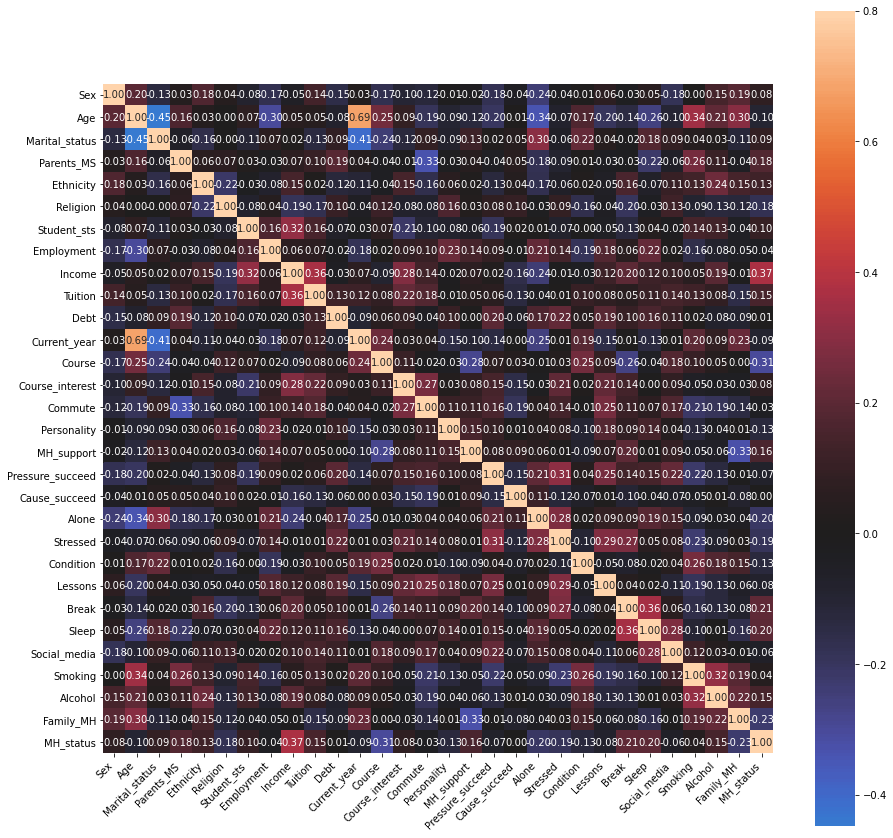

In [24]:
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr,
            vmax=.8, 
            center = 0,
            square=True,
            cbar=True, 
            annot=True, 
            fmt='.2f', 
            annot_kws={'size': 10}, 
           )

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);
plt.show()

In [1]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = my_data['MH_status'].value_counts(normalize = True).rename_axis('MH_status').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'MH_status', y = 'Percentage', data = eda_percentage, palette='Dark2')
sns.set_style("whitegrid")
sns.countplot(x = "Reg14", data = reg_141, hue = "disabled")
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental Health Status', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

NameError: name 'plt' is not defined

(array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

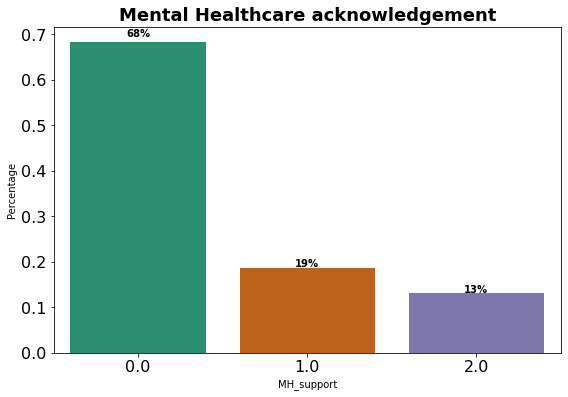

In [26]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = my_data['MH_support'].value_counts(normalize = True).rename_axis('MH_support').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'MH_support', y = 'Percentage', data = eda_percentage, palette='Dark2')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental Healthcare acknowledgement', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

In [27]:
# Scale only columns that have values greater than 1
#to_scale = [col for col in my_data.columns if my_data[col].max() > 1]
#mms = MinMaxScaler()
#scaled = mms.fit_transform(my_data[to_scale])
#scaled = pd.DataFrame(scaled, columns=to_scale)

# Replace original columns with scaled ones
#for col in scaled:
 #   my_data[col] = scaled[col]
    
#my_data.head()

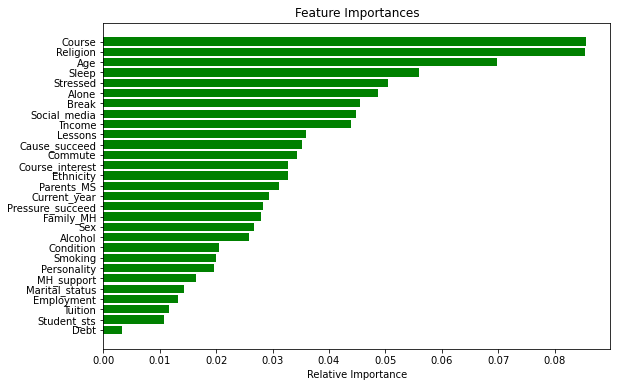

In [28]:
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
X_data=my_data.drop(['MH_status'], axis=1)

#declare the random forest model
rf_model = RandomForestClassifier(random_state=1, max_depth=4)

#fit the random forest model
rf_model.fit(X_data, my_data.MH_status)

train_features = X_data.columns
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-29:]
#plot
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [train_features[i]for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [29]:
# Using Random Forest Classifier we have been able to view the importance
# of each feature with respect to our model. What we can deduce therfore
# is that Course and religion has more effect on our model than the others
# based on this information, we will dropping some less important feature.

mydata = my_data.drop(['Debt', 'Tuition', 'Student_sts', 'MH_support', 
                       'Personality', 'Marital_status', 'Condition', 
                       'Employment', 'Current_year'], axis=1)
# Dropping COlumns less than 0.02 in the feature importances chart

mydata.head()

Sex   Age  Parents_MS  Ethnicity  Religion  Income  Course  \
0  1.0  21.0         1.0        0.0       4.0     2.0     2.0   
1  0.0  19.0         1.0        0.0       4.0     2.0    10.0   
2  1.0  19.0         0.0        0.0       0.0     2.0     2.0   
3  1.0  21.0         1.0        0.0       4.0     3.0     5.0   
4  0.0  19.0         1.0        4.0       0.0     3.0     1.0   

   Course_interest  Commute  Pressure_succeed  ...  Alone  Stressed  Lessons  \
0              2.0      6.0               3.0  ...    3.0       4.0      2.0   
1              2.0      1.0               3.0  ...    4.0       3.0      2.0   
2              2.0      6.0               2.0  ...    4.0       2.0      4.0   
3              2.0      6.0               3.0  ...    1.0       1.0      4.0   
4              3.0      3.0               3.0  ...    2.0       3.0      4.0   

   Break  Sleep  Social_media  Smoking  Alcohol  Family_MH  MH_status  
0    4.0    3.0           5.0      1.0      1.0        1.0        2.0  
1    4.0    3.0           4.0      1.0      1.0        0.0        2.0  
2    4.0    3.0           3.0      1.0      1.0        1.0        2.0  
3    2.0    2.0           1.0      1.0      1.0        0.0        3.0  
4    3.0    3.0           5.0      1.0      1.0        0.0        3.0  

[5 rows x 21 columns]

In [30]:
#Splitting the data set for training the model
y = my_data.pop('MH_status')
X = my_data

print('\n Shape of Target Variable: \n', y.shape)
print('\n Shape of independent Variable: \n', X.shape)


 Shape of Target Variable: 
 (107,)

 Shape of independent Variable: 
 (107, 29)


In [31]:
# spliting the data into train and test splitting using the 70:30 dimension
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
print('\n Shape of Training Data: \n', X_train.shape)
print('\n Shape of Test Data: \n', X_test.shape)


 Shape of Training Data: 
 (74, 29)

 Shape of Test Data: 
 (33, 29)


In [32]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
#instantiate Model
my_model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=1, min_samples_split=8, criterion='gini', random_state=1)
model2 = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model3 = GradientBoostingClassifier(random_state=20, min_samples_split=8, max_depth=3)
model4 = MultinomialNB()
# train model to fit
my_model.fit(X_train, y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)
model4.fit(X_train, y_train)


#predicting the model
y_pred = my_model.predict(X_test)
y_pred2 = model2.predict(X_test)
y_pred3 = model3.predict(X_test)
y_pred4 = model4.predict(X_test)
print('\nDecision Tree Model:\n', y_pred)
print('\nLogistic Regression Model:\n', y_pred2)
print('\nGradient Boosting ClassifierModel:\n', y_pred3)
print('\nNaive Bayes Classifier:\n', y_pred4)

C:\Users\Emeka Ichoku\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Decision Tree Model:
 [2. 2. 1. 1. 3. 2. 2. 2. 1. 1. 3. 1. 1. 3. 1. 1. 3. 3. 3. 1. 1. 3. 3. 2.
 2. 1. 3. 2. 3. 2. 2. 1. 2.]

Logistic Regression Model:
 [2. 1. 3. 2. 2. 2. 2. 3. 2. 2. 3. 2. 2. 3. 1. 2. 1. 3. 3. 2. 2. 2. 2. 1.
 2. 2. 1. 2. 2. 2. 2. 2. 3.]

Gradient Boosting ClassifierModel:
 [2. 3. 2. 2. 2. 2. 2. 2. 2. 2. 3. 2. 2. 2. 1. 1. 2. 3. 3. 2. 1. 3. 2. 2.
 2. 2. 2. 2. 3. 2. 1. 2. 3.]

Naive Bayes Classifier:
 [2. 3. 2. 2. 3. 3. 1. 3. 2. 2. 1. 3. 2. 3. 1. 3. 1. 3. 3. 2. 2. 3. 3. 2.
 2. 2. 1. 1. 3. 3. 2. 1. 3.]


In [33]:
#Compute test accuracy
model_accuracy = accuracy_score(y_test, y_pred)
print('Decision Tree Classifier Model Accuracy on Test Data: {:.2f}'.format(model_accuracy), '\n')

model_accuracy2 = accuracy_score(y_test, y_pred2)
print('Logistic Regression Model Accuracy on Test Data: {:.2f}'.format(model_accuracy2), '\n')

model_accuracy3 = accuracy_score(y_test, y_pred3)
print('Gradient Boosting Classifier Model Accuracy on Test Data: {:.2f}'.format(model_accuracy3), '\n')

model_accuracy4 = accuracy_score(y_test, y_pred4)
print('Multinomial Naive Bayes Model Accuracy on Test Data: {:.2f}'.format(model_accuracy4), '\n')


Decision Tree Classifier Model Accuracy on Test Data: 0.36 

Logistic Regression Model Accuracy on Test Data: 0.58 

Gradient Boosting Classifier Model Accuracy on Test Data: 0.70 

Multinomial Naive Bayes Model Accuracy on Test Data: 0.58 



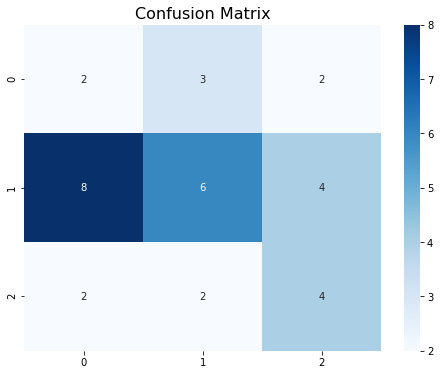

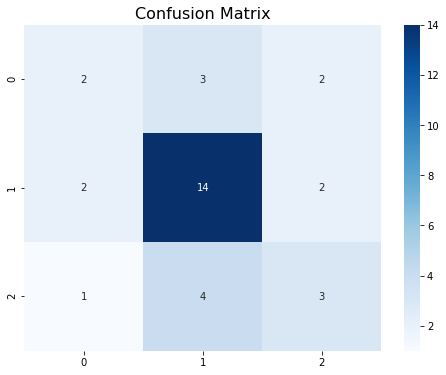

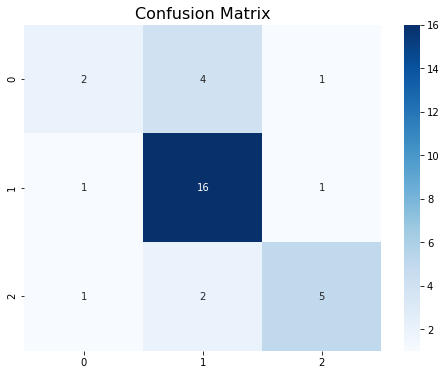

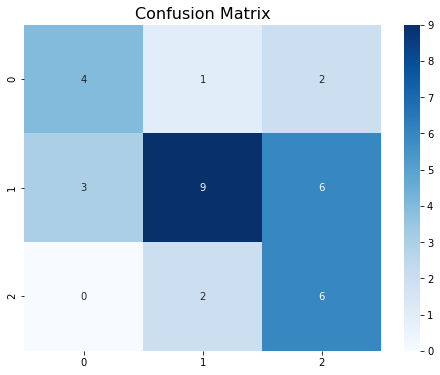

In [34]:
#confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm, annot=True, cmap='Blues');

#confusion Matrix
cm2 = confusion_matrix(y_test, y_pred2)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm2, annot=True, cmap='Blues');

#confusion Matrix
cm3 = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm3, annot=True, cmap='Blues');

#confusion Matrix
cm4 = confusion_matrix(y_test, y_pred4)
plt.figure(figsize=(8, 6))
plt.title('Confusion Matrix', size=16)
sns.heatmap(cm4, annot=True, cmap='Blues');


In [35]:
class_report = classification_report(y_test, y_pred)
print('\nClassification report on Mental Health Data prediction\n', class_report, '\n')

class_report2 = classification_report(y_test, y_pred2)
print('\nClassification report on Mental Health Data prediction\n', class_report2, '\n')

class_report3 = classification_report(y_test, y_pred3)
print('\nClassification report on Mental Health Data prediction\n', class_report3, '\n')

class_report4 = classification_report(y_test, y_pred4)
print('\nClassification report on Mental Health Data prediction\n', class_report4, '\n')


Classification report on Mental Health Data prediction
               precision    recall  f1-score   support

         1.0       0.17      0.29      0.21         7
         2.0       0.55      0.33      0.41        18
         3.0       0.40      0.50      0.44         8

    accuracy                           0.36        33
   macro avg       0.37      0.37      0.36        33
weighted avg       0.43      0.36      0.38        33
 


Classification report on Mental Health Data prediction
               precision    recall  f1-score   support

         1.0       0.40      0.29      0.33         7
         2.0       0.67      0.78      0.72        18
         3.0       0.43      0.38      0.40         8

    accuracy                           0.58        33
   macro avg       0.50      0.48      0.48        33
weighted avg       0.55      0.58      0.56        33
 


Classification report on Mental Health Data prediction
               precision    recall  f1-score   support

        

In [36]:
#Let's try tuning our model to achieve our goal of 75% accuracy
print('\n Hyperparameter of model \n', my_model.get_params(), '\n')
print('\n Hyperparameter of model \n', model2.get_params(), '\n')
print('\n Hyperparameter of model \n', model3.get_params(), '\n')
print('\n Hyperparameter of model \n', model4.get_params(), '\n')


 Hyperparameter of model 
 {'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'random_state': 1, 'splitter': 'best'} 


 Hyperparameter of model 
 {'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'multinomial', 'n_jobs': None, 'penalty': 'l2', 'random_state': 0, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False} 


 Hyperparameter of model 
 {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.1, 'loss': 'deviance', 'max_depth': 3, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 1, 'min_samples_split': 8, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_it

In [37]:
from sklearn.model_selection import RandomizedSearchCV, KFold, cross_val_score
kfold_split = KFold(n_splits=10)

classifier_hypara = dict()
classifier_hypara['max_depth'] = [2,3,4,6,8,10]
classifier_hypara['learning_rate'] = [0.05, 0.1, 0.3, 0.5]
classifier_hypara['min_samples_split'] = [2,4,6,8,9]
classifier_hypara['min_samples_leaf'] = [0.05,0.1,0.5,1]
classifier_hypara['random_state'] = [1,5,10,15,20]
classifier_hypara['criterion'] = ['gini', 'friedman_mse']

classifier_grid = RandomizedSearchCV(model3, classifier_hypara, scoring='accuracy', n_jobs=-1, cv=kfold_split)
classifier_grid_fit = classifier_grid.fit(X_train, y_train)

CV_scores = -cross_val_score(classifier_grid_fit, X_train, y_train, cv=kfold_split)
print('\nCross Val mean: {:.3f} (std: {:.3f})'.format(CV_scores.mean()*-1, CV_scores.std()), end='\n\n')

print('\n Suggested Best Hyperparameter: \n', classifier_grid_fit.best_estimator_.get_params())

print('\nBest Score: %s {:.3f} \n'.format(classifier_grid_fit.best_score_))

C:\Users\Emeka Ichoku\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.38928571 0.35714286 0.38392857        nan 0.38928571        nan
 0.40178571 0.3875            nan        nan]
  warnings.warn(
C:\Users\Emeka Ichoku\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan        nan        nan 0.40238095        nan 0.33333333
        nan 0.3452381         nan        nan]
  warnings.warn(
C:\Users\Emeka Ichoku\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.46666667        nan 0.36190476        nan        nan        nan
        nan        nan 0.49285714        nan]
  warnings.warn(
C:\Users\Emeka Ichoku\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.3880952


Cross Val mean: 0.446 (std: 0.179)


 Suggested Best Hyperparameter: 
 {'ccp_alpha': 0.0, 'criterion': 'friedman_mse', 'init': None, 'learning_rate': 0.05, 'loss': 'deviance', 'max_depth': 4, 'max_features': None, 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_impurity_split': None, 'min_samples_leaf': 0.05, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 100, 'n_iter_no_change': None, 'random_state': 1, 'subsample': 1.0, 'tol': 0.0001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}

Best Score: %s 0.402 



C:\Users\Emeka Ichoku\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.43333333        nan 0.54047619 0.40714286 0.43571429
        nan        nan        nan 0.45      ]
  warnings.warn(


In [38]:
import joblib
# saving the model 
MH_model = 'MH_model.sav'
joblib.dump(model2, MH_model)

#Testing the model
#loaded_model = joblib.load(final_model)
#results = loaded_model.score(X_test, y_test)
# print('\n See the result of the persistent model\n', results)


['MH_model.sav']

CLUSTERING

In [39]:
from sklearn.preprocessing import normalize
# Scaling the data set
min_maxscaler = MinMaxScaler()
X_scaled = min_maxscaler.fit_transform(X)

# Normalizing the data
normalized_X = normalize(X)


pca variance explained [0.43307273 0.13007644 0.08692928]


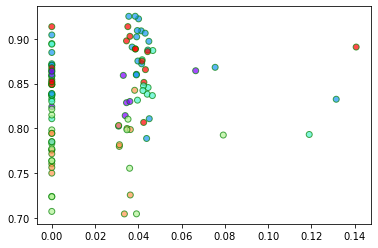

In [40]:
#importing Spectral clustering lib
from sklearn.cluster import SpectralClustering
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA

#initialize spectral estimator
sc = SpectralClustering(n_clusters=6, affinity='nearest_neighbors', random_state=0)
sc_clustering =sc.fit(normalized_X)

#show plot
plt.scatter(normalized_X[:,0], normalized_X[:,1], c=sc_clustering.labels_,
            cmap='rainbow', alpha=0.7, edgecolors='g')


pca = PCA(n_components=3)
pca.fit(normalized_X)
pca_scale = pca.transform(normalized_X)
pca_data = pd.DataFrame(pca_scale, columns=['pc1', 'pc2','pc3'])
print('\npca variance explained', pca.explained_variance_ratio_)

<function matplotlib.pyplot.show(close=None, block=None)>

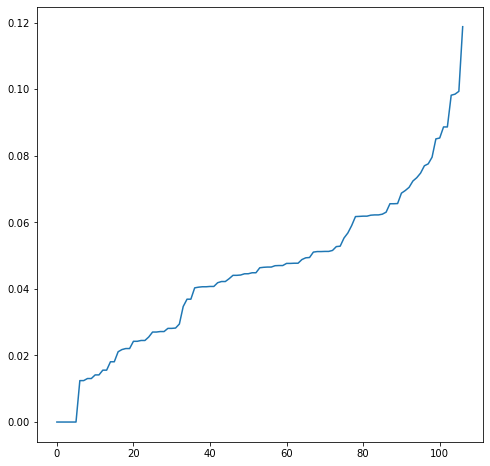

In [41]:
# Determining the number of epsilon using elbow method
plt.figure(figsize=(8,8))
nn = NearestNeighbors(n_neighbors=5).fit(pca_data)
distances, idx = nn.kneighbors(pca_data)
distances = np.sort(distances, axis=0)
distances = distances[:,1]
plt.plot(distances)
plt.show

In [42]:
# Compute DBSCAN 
db = DBSCAN(eps=0.06, min_samples=20).fit(pca_data)
labels = db.labels_
core_sample_mask = np.zeros_like(labels, dtype=bool)
core_sample_mask[db.core_sample_indices_] = True

#Number of cluster in labels, ignoring noise if present
no_of_clusters = len(set(labels)) #- (1 if -1 in labels else 0)
_noise_ = list(labels).count(-1)

In [43]:
from sklearn import metrics

#Cluster evaluation display
print('Estimates number of clusters: %d' % no_of_clusters)
print('Estimates number of noise point: %d' % _noise_)
#print('Homogenity Score: %0.3f' % metrics.homogeneity_score(y_train, labels))
#print('Level of Completeness: %0.3f' % metrics.completeness_score(y_train, labels))
#print('V-measure: %0.3f' % metrics.v_measure_score(y_train, labels))
#print('Shilouette Coefficient: %0.3f' % metrics.silhouette_score(pca_data, labels))

Estimates number of clusters: 1
Estimates number of noise point: 107


In [44]:
import plotly.offline as pyo
import plotly.graph_objs as go
from plotly import tools

#plot 3D version of cluster 
scene = dict(xaxis=dict(title='PC1'), yaxis=dict(title='PC2'), zaxis=dict(title='PC3'))
trace = go.Scatter3d(x=pca_data.iloc[:,0], y=pca_data.iloc[:,1], z=pca_data.iloc[:,2], mode='markers', 
                     marker=dict(color=labels, colorscale='Viridis', size=10,
                                 line=dict(color='blue', width=5)))

go_layout = go.Layout(scene=scene, height=500, width=500)
clust_data = [trace]
_fig = go.Figure(data=clust_data, layout=go_layout)
_fig.update_layout(title='Number of Clusters derived - DBSCAN', font=dict(size=10))
_fig.show()